# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [3]:
data=pd.read_csv('Cancer_Data.csv')

## 🔍 Step 2: Explore the Dataset

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.shape

(569, 33)

In [6]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [8]:
# Drop the 'Unnamed: 32' column and 'id'
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [9]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


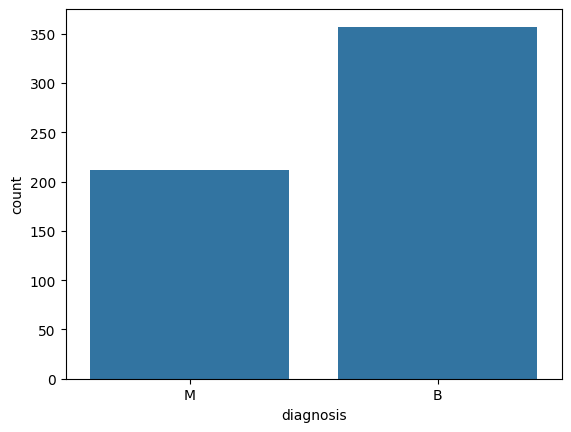

In [10]:
## 📊 Step 4: Visualize the Data
plot = sns.countplot(x='diagnosis', data=data)

## ⚙️ Step 5: Preprocess the Data

In [11]:
# Convert diagnosis column to 0 (benign) and 1 (malignant)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [12]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#   0 --> B
#   1 --> M

In [14]:
# Split features and labels
x= data.drop('diagnosis', axis=1)
y= data['diagnosis']

In [15]:
print(x.head(5))
print(y.head(5))

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [16]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [17]:
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (483, 30) (86, 30)


## 🤖 Step 6: Train a Machine Learning Model

In [19]:
# Use Logistic Regression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [20]:
x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [21]:
print(training_data_accuracy)

0.989648033126294


In [22]:
x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [23]:
print(test_data_accuracy)

0.9651162790697675


## 🧪 Step 7: Evaluate the Model

In [24]:
input= (13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)
input_to_numpy = np.asarray(input)
input_reshaped = input_to_numpy.reshape(1,-1)
std_data = scaler.transform(input_reshaped)
print(std_data)

[[-0.2874754  -0.84586734 -0.25109617 -0.37287729  0.80527337  0.43821207
  -0.53771831 -0.44182307  0.59597809  0.75624863 -0.7665077  -0.86063758
  -0.70890921 -0.5430365  -0.94730661 -0.3684638  -0.54423789 -0.87191319
  -0.455939   -0.55237907 -0.35523414 -0.86266212 -0.32184435 -0.43122713
  -0.0334446   0.15161268 -0.39392551 -0.61897425  0.47923801 -0.12301622]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
pred= LR.predict(std_data)
if pred[0]==1:
  print("Malignant is present, So likely to have cancer")
else:
  print("Benign is present, Not harmful.")

Benign is present, Not harmful.


In [26]:
input= (14.68,20.13,94.74,684.5,0.09867,0.072,0.07395,0.05259,0.1586,0.05922,0.4727,1.24,3.195,45.4,0.005718,0.01162,0.01998,0.01109,0.0141,0.002085,19.07,30.88,123.4,1138,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216)
input_to_numpy = np.asarray(input)
input_reshaped = input_to_numpy.reshape(1,-1)
std_data = scaler.transform(input_reshaped)
print(std_data)

[[ 0.16426598  0.16966438  0.1216031   0.09026904  0.17995659 -0.60967882
  -0.17434908  0.11003422 -0.82719096 -0.5220387   0.25066195  0.03477437
   0.16640348  0.11961637 -0.42737212 -0.7811088  -0.43133751 -0.1058488
  -0.78433643 -0.68915105  0.59542803  0.82101613  0.49640776  0.47258597
   0.62472525 -0.43297228  0.10064365  0.70891266  0.22116636 -0.10463144]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
pred= LR.predict(std_data)
if pred[0]==1:
  print("Malignant is present, So likely to have cancer")
else:
  print("Benign is present, Not harmful.")

Malignant is present, So likely to have cancer


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.94      0.97      0.96        33

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



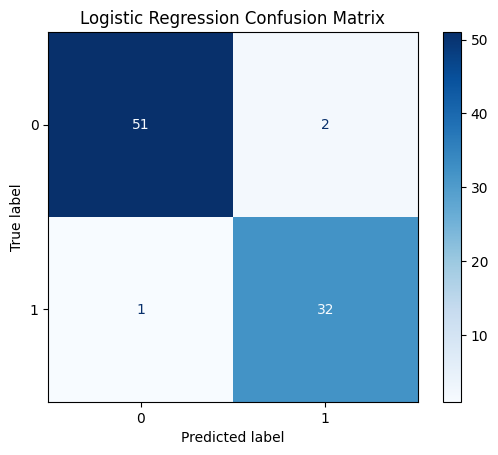

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(y_test, x_test_prediction))

ConfusionMatrixDisplay.from_estimator(LR, x_test, y_test, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
x_train_prediction = rfc.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [32]:
print(training_data_accuracy)

1.0


In [33]:
x_test_prediction = rfc.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [34]:
print(test_data_accuracy)

0.9302325581395349


In [35]:
input= (13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179)
input_to_numpy = np.asarray(input)
input_reshaped = input_to_numpy.reshape(1,-1)
std_data = scaler.transform(input_reshaped)
print(std_data)

[[-0.26206495 -0.16808033 -0.23677732 -0.3317713   1.39305698  0.36390708
   0.45097506  0.64442929  1.19736974  0.70736025 -0.40598739 -0.59508782
  -0.46061411 -0.33645614 -0.16628224 -0.12289517 -0.09000199  0.07067908
  -0.37629037 -0.06241356 -0.11184798  0.34621562 -0.12080182 -0.20166751
   2.0190061   1.04948349  1.11103301  1.43113115  1.67136255  1.88649632]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
pred= LR.predict(std_data)
if pred[0]==1:
  print("Malignant is present, So likely to have cancer")
else:
  print("Benign is present, Not harmful.")

Malignant is present, So likely to have cancer


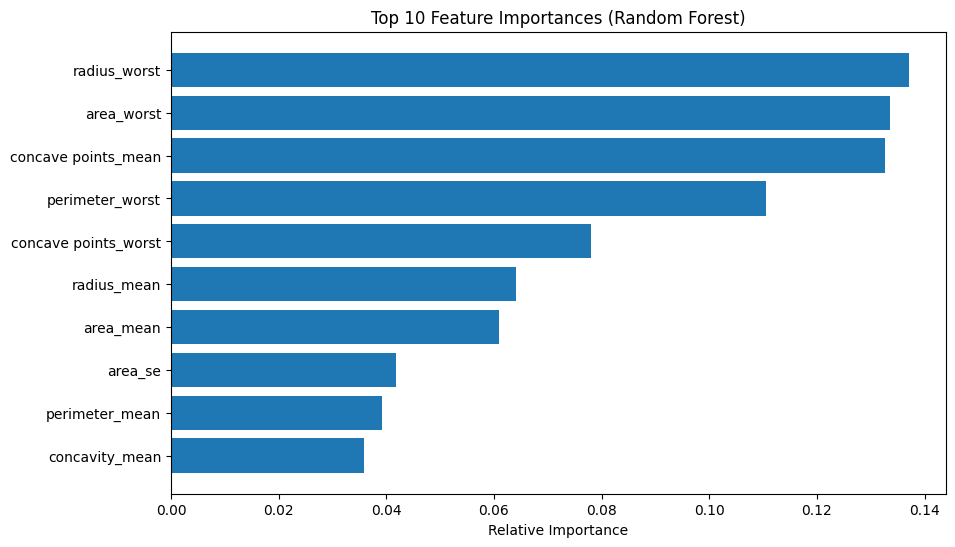

In [37]:
importances = rfc.feature_importances_
features = x.columns
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
